In [10]:
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def zscore_detector(data: np.ndarray, threshold: float = 3.0) -> np.ndarray:
    """
    Обнаружение аномалий с помощью Z-Score.
    
    Параметры:
        data: одномерный массив данных
        threshold: пороговое значение (в стандартных отклонениях)
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    z_scores = np.abs(stats.zscore(data))
    return (z_scores > threshold).astype(int)

def iqr_detector(data: np.ndarray, k: float = 1.5) -> np.ndarray:
    """
    Обнаружение аномалий с помощью межквартильного размаха (IQR).
    
    Параметры:
        data: одномерный массив данных
        k: множитель IQR (обычно 1.5)
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return ((data < lower_bound) | (data > upper_bound)).astype(int)

def modified_zscore_detector(data: np.ndarray, threshold: float = 3.5) -> np.ndarray:
    """
    Обнаружение аномалий с помощью модифицированного Z-Score (более устойчив к выбросам).
    
    Параметры:
        data: одномерный массив данных
        threshold: пороговое значение
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z = 0.6745 * (data - median) / mad
    return (np.abs(modified_z) > threshold).astype(int)

def isolation_forest_detector(data: np.ndarray, 
                            contamination: float = 0.05) -> np.ndarray:
    """
    Обнаружение аномалий с помощью Isolation Forest.
    
    Параметры:
        data: одномерный массив данных
        contamination: предполагаемая доля аномалий
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    clf = IsolationForest(contamination=contamination, random_state=42)
    data_reshaped = data.reshape(-1, 1)
    preds = clf.fit_predict(data_reshaped)
    return (preds == -1).astype(int)

def lof_detector(data: np.ndarray, 
                n_neighbors: int = 20, 
                contamination: float = 0.05) -> np.ndarray:
    """
    Обнаружение аномалий с помощью Local Outlier Factor (LOF).
    
    Параметры:
        data: одномерный массив данных
        n_neighbors: количество соседей для анализа
        contamination: предполагаемая доля аномалий
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    data_reshaped = data.reshape(-1, 1)
    preds = lof.fit_predict(data_reshaped)
    return (preds == -1).astype(int)

def percentile_detector(data: np.ndarray, 
                       lower_percentile: float = 1, 
                       upper_percentile: float = 99) -> np.ndarray:
    """
    Обнаружение аномалий по перцентилям.
    
    Параметры:
        data: одномерный массив данных
        lower_percentile: нижний перцентиль
        upper_percentile: верхний перцентиль
    
    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return ((data < lower_bound) | (data > upper_bound)).astype(int)

import numpy as np

def majority_anomaly_vote(*anomaly_arrays: np.ndarray) -> np.ndarray:
    """
    Объединяет результаты нескольких методов обнаружения аномалий.
    Аномалия отмечается, если более половины методов считают точку аномальной.

    Параметры:
        *anomaly_arrays: любое количество бинарных массивов (0 - норма, 1 - аномалия)

    Возвращает:
        Бинарный массив (1 - аномалия, 0 - норма)
    """
    if len(anomaly_arrays) == 0:
        raise ValueError("Не передано ни одного массива аномалий.")
    anomaly_matrix = np.vstack(anomaly_arrays)
    anomaly_counts = np.sum(anomaly_matrix, axis=0)
    threshold = len(anomaly_arrays) / 2
    final_anomalies = (anomaly_counts > threshold).astype(int)
    
    return final_anomalies


   



In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_anomalies_comparison(data, **anomaly_dict):
    """
    Функция для построения графика сравнения методов обнаружения аномалий.
    
    Параметры:
        data: массив исходных данных
        anomaly_dict: именованные массивы аномалий (где 1 - аномалия, 0 - нет)
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(data)), data, c='blue', label='Данные', alpha=0.5)

    # Перебираем методы и отображаем найденные аномалии
    for method_name, anomalies in anomaly_dict.items():
        anomaly_indices = np.where(anomalies == 1)[0]
        plt.scatter(anomaly_indices, data[anomaly_indices], label=method_name, alpha=0.6)

    plt.legend()
    plt.title("Сравнение методов обнаружения аномалий")
    plt.show()




Количество обнаруженных аномалий:
Z-Score: 6
IQR: 13
Modified Z-Score: 6
Isolation Forest: 51
LOF: 51
Percentile: 22


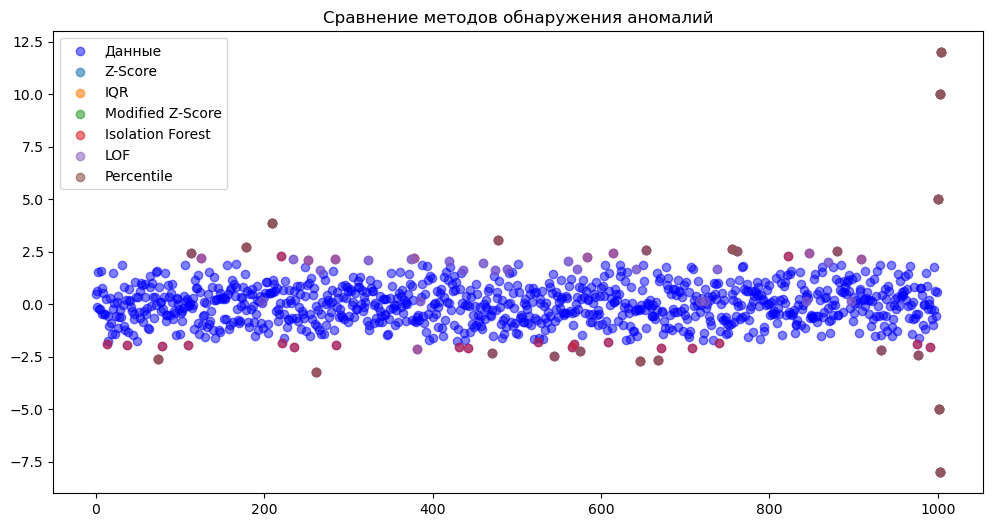

6
Обнаружено аномалий (по большинству методов): 13


In [38]:
if __name__ == "__main__":
    # Создаем тестовые данные
    np.random.seed(42)
    normal_data = np.random.normal(0, 1, 1000)
    anomalies = np.array([5, -5, 10, -8, 12])  # Явные аномалии
    data = np.concatenate([normal_data, anomalies])
    
    # Применяем детекторы
    methods = {
        "Z-Score": zscore_detector,
        "IQR": iqr_detector,
        "Modified Z-Score": modified_zscore_detector,
        "Isolation Forest": isolation_forest_detector,
        "LOF": lof_detector,
        "Percentile": percentile_detector
    }
    
    results = {name: detector(data) for name, detector in methods.items()}

    # Выводим количество обнаруженных аномалий
    print("Количество обнаруженных аномалий:")
    for name, anomalies in results.items():
        print(f"{name}: {np.sum(anomalies)}")
    
    # Визуализация с новой функцией
    plot_anomalies_comparison(data, **results)


    res = []
    for i, (name, anomalies) in enumerate(results.items(), 1):
        res.append(anomalies)
    
    print(len(res))
    final_anomalies = majority_anomaly_vote(res[0], res[1], res[2], res[3], res[4], res[5])
        
    print("Обнаружено аномалий (по большинству методов):", np.sum(final_anomalies))
    

   